# Dataset Exploration

`loader = METRLADatasetLoader()`
`dataset = loader.get_dataset()`
- `num_timesteps_in=12`, `num_timesteps_out=12` are defaults. Each timestep is 5 minutes, so 12 timesteps will equate to 1 hour. (12*5 mins = 60 mins).

`next(iter(dataset))` - shows the first sample.
- Output will be Data(x=[207, 2, 12], edge_index=[2, 1722], edge_attr=[1722], y=[207, 12])
- Here, each x is the dimensions of [num_sensors, num_features (speed, time), num_timesteps]. We will have 34249 such x's in the entire dataset since the data is taken over 4 months and there are approx 34249 5-minute intervals in 4 months.
- edge_index has dimension [2, num_edges] where one row is source_node and the second row is destination_node.
- edge_attr has shape [num_edges] and has weights for the edge at ith index of edge_index.
- y is the output which has shape [201, 12]. We will have 34249 such y's.


In [1]:
import pandas as pd
import numpy as np
import os
import typing
import torch
import matplotlib.pyplot as plt
from torch_geometric_temporal.dataset import METRLADatasetLoader
from torch_geometric_temporal.signal import temporal_signal_split

c:\Users\kedar\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# %pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 18.1 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.6 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
# len(dataset.features)

34249

In [2]:
loader = METRLADatasetLoader()

dataset = loader.get_dataset()

train_dataset, test_dataset = temporal_signal_split(dataset, train_ratio = 0.8)

# DATASET INFO
# num_timesteps_in=12, num_timesteps_out=12 are defaults - equates to 1 hour (5 min intervals)


# next(iter(dataset)) # Showing first sample
# x = [num_sensors, num_features(speed, time), num_timesteps]. Each timestep is 5 minutes. 
# Each data point has a sliding window of 5 minutes.
# edge_index is ------ of shape [2, 1722] where 1722 is number of edges
# edge_attr 

In [3]:
next(iter(dataset)) # Showing first sample
# x = [num_sensors, num_features(speed, time), num_timesteps]. Each timestep is 5 minutes. 
# Each data point has a sliding window of 5 minutes.
# edge_index is ------ of shape [2, 1722]
# edge_attr 

Data(x=[207, 2, 12], edge_index=[2, 1722], edge_attr=[1722], y=[207, 12])

In [86]:
temp = next(iter(dataset))
print(temp.edge_attr)
print(temp.edge_index)

print(np.array(temp.edge_index))

tensor([1.0000, 0.2223, 0.5088,  ..., 0.2779, 0.3204, 1.0000])
tensor([[  0,   0,   0,  ..., 206, 206, 206],
        [  0,  13,  37,  ..., 187, 198, 206]])
[[  0   0   0 ... 206 206 206]
 [  0  13  37 ... 187 198 206]]


In [57]:
# len(dataset.edge_index[0])
# len(dataset.features) # 34249
# dataset.features[0].shape
dataset.features[0][0]

array([[ 0.53317183,  0.44864222,  0.51461655, -2.6521542 , -2.6521542 ,
         0.18474454,  0.63831854,  0.49606127,  0.74965036,  0.48987615,
         0.57509303,  0.4280252 ],
       [-1.7291821 , -1.7171322 , -1.7050823 , -1.6930324 , -1.6809825 ,
        -1.6689326 , -1.6568825 , -1.6448327 , -1.6327827 , -1.6207328 ,
        -1.6086829 , -1.596633  ]], dtype=float32)

In [63]:
dataset.features[32428][0]

array([[0.45276558, 0.49606127, 0.5201146 , 0.58883774, 0.5764676 ,
        0.56409734, 0.5764676 , 0.66305894, 0.61357814, 0.47750598,
        0.52561224, 0.49606127],
       [0.34340465, 0.35545453, 0.36750463, 0.37955448, 0.39160436,
        0.40365425, 0.41570434, 0.4277542 , 0.43980408, 0.45185396,
        0.46390384, 0.47595394]], dtype=float32)

In [59]:
dataset.features[1][0]

array([[ 0.44864222,  0.51461655, -2.6521542 , -2.6521542 ,  0.18474454,
         0.63831854,  0.49606127,  0.74965036,  0.48987615,  0.57509303,
         0.4280252 ,  0.37235928],
       [-1.7171322 , -1.7050823 , -1.6930324 , -1.6809825 , -1.6689326 ,
        -1.6568825 , -1.6448327 , -1.6327827 , -1.6207328 , -1.6086829 ,
        -1.596633  , -1.584583  ]], dtype=float32)

In [61]:
#dataset.targets[0][0]
#len(dataset.targets) # 34249
dataset.targets[0][0]

array([0.37235928, 0.24522121, 0.49606127, 0.65206325, 0.11258511,
       0.5311103 , 0.50911874, 0.47132087, 0.42184007, 0.3909146 ,
       0.47613147, 0.56409734], dtype=float32)

In [30]:
dataset.targets[0]

(207, 12)

In [ ]:
dataset.edge_index[0]

In [74]:
print(temp.x.shape)
print(temp.y.shape)

torch.Size([207, 2, 12])
torch.Size([207, 12])


In [70]:
temp.edge_index.shape


torch.Size([2, 1722])

In [81]:
temp.edge_attr[-1]


tensor(1.)

In [82]:
import networkx as nx

[  0   0   0 ... 206 206 206]
[  0  13  37 ... 187 198 206]
[1.         0.22234692 0.5088465  ... 0.27790868 0.32041067 1.        ]
[('0', '13', 0.22234692), ('0', '37', 0.5088465), ('0', '42', 0.13740046), ('0', '54', 0.4409315), ('0', '111', 0.21944809), ('0', '116', 0.41578582), ('0', '125', 0.10258746), ('0', '140', 0.11251228), ('0', '142', 0.7216228), ('0', '145', 0.87776124), ('0', '199', 0.11980409), ('1', '2', 0.3909554), ('1', '7', 0.39045706), ('1', '28', 0.573732), ('1', '78', 0.20909733), ('1', '107', 0.16216348), ('1', '177', 0.92621875), ('1', '183', 0.15487239), ('2', '1', 0.7174379), ('2', '28', 0.17432716), ('2', '49', 0.441055), ('2', '78', 0.92367977), ('2', '123', 0.29931417), ('2', '129', 0.16393073), ('2', '177', 0.4829466), ('2', '183', 0.5701921), ('3', '4', 0.63372165), ('3', '12', 0.11933213), ('3', '15', 0.52255076), ('3', '17', 0.7409004), ('3', '33', 0.27014008), ('3', '80', 0.5133506), ('3', '144', 0.19402061), ('3', '161', 0.16145374), ('3', '188', 0.263

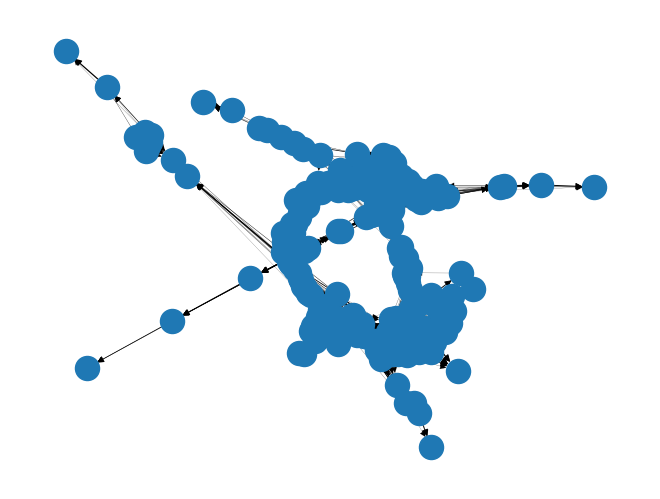

In [116]:
G = nx.DiGraph()

# print(temp.edge_attr)
# print(temp.edge_index)

nodes = np.array(temp.edge_index[0])
#print(nodes)

targets = np.array(temp.edge_index[1])
#print(targets)

weight_range = len(temp.edge_attr)
weights = np.array(temp.edge_attr)
#weights = weight_range * weights

#print(weights)

pairs = []

for i in range(len(nodes)):
    if (nodes[i] != targets[i]):
        pair = (str(nodes[i]), str(targets[i]), weights[i])
        pairs.append(pair)

#print(pairs)
#print(len(pairs))

for p in pairs:
    G.add_edge(p[0], p[1], weight = p[2])

weights = nx.get_edge_attributes(G,'weight').values()

pos = nx.fruchterman_reingold_layout(G)

nx.draw(G, pos, width=list(weights))

plt.show()

[]

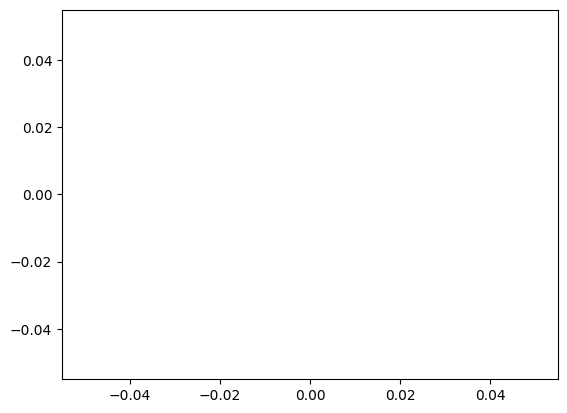

In [92]:
# Visualize traffic over time
sensor_number = 1
hours = 24
sensor_labels = [bucket.y[sensor_number][0].item() for bucket in list(dataset)[:hours]]
plt.plot(data=sensor_labels)

In [93]:
dataset[:hours]

In [2]:
temp1 = next(iter(dataset))
for i in range(1000):
    temp1 = next(iter(dataset))
print(temp1.edge_attr)
print(temp1.edge_index)

print(np.array(temp1.edge_index))

NameError: name 'dataset' is not defined

In [1]:
temp1.edge_index

NameError: name 'temp1' is not defined